# Get the Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Doubt**: File size of merged_2.csv and e1_merged.csv are different 

In [ ]:
#train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/merged_2.csv', sep=';')
train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e1_merged.csv', sep=';')
train.columns

Samples has serveral Thickness

In [ ]:
train['Thickness (mm)'].value_counts().index.sort_values().tolist()

51 frecuencies (Ghz)

In [ ]:
train['Frequency (GHz)'].value_counts().index.sort_values()

15 types of plastic

In [ ]:
train['Sample'].value_counts().index.sort_values()

### Add data of Experiments 2, 3 and 4
**TODO**: Add temparature and RH to experiments 3 and 4

In [ ]:
train_e1 = train.copy()
train_e1 = train_e1.drop(columns=['Thickness (mm)']) # Remove `Thickness (mm)`

train_e1['num_experiment'] = 'e1'
train_e1['Sample_original'] = 'None'

# ['E1', 'H1', 'REF']
train_e2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e2_merged.csv', sep=';') 
train_e2['num_experiment'] = 'e2'
train_e2['Sample_original'] = 'None'

# ['REF_1', 'REF_10', 'REF_11', 'REF_12', 'REF_13', 'REF_14', 'REF_15', 'REF_2', 'REF_3', 'REF_4', 'REF_5', 'REF_6', 'REF_7', 'REF_8', 'REF_9']
train_e3 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e3_merged.csv', sep=',') 
train_e3['num_experiment'] = 'e3'
train_e3['Sample_original'] = train_e3['Sample']
train_e3['Sample'] = 'REF'

# ['B1_12', 'B1_2', 'B1_5', 'B1_9', 'C1_11', 'C1_14', 'C1_4', 'C1_7', 'E3_10', 'E3_13', 'E3_3', 'E3_6', 'REF_1', 'REF_15', 'REF_8']
train_e4 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_merged.csv', sep=',')
train_e4['num_experiment'] = 'e4'
train_e4['Sample_original'] = train_e4['Sample']

Replace name of Sample from experiment 4 by name of experiment 1

In [ ]:
df_temp = train_e4.query('Sample.str.startswith("B1")', engine="python")
df_temp = df_temp.drop(columns=['Sample'])
df_temp['Sample'] = 'B1'
df_temp2 = train_e4.query('Sample.str.startswith("C1")', engine="python")
df_temp2 = df_temp2.drop(columns=['Sample'])
df_temp2['Sample'] = 'C1'
df_temp3 = train_e4.query('Sample.str.startswith("E3")', engine="python")
df_temp3 = df_temp3.drop(columns=['Sample'])
df_temp3['Sample'] = 'E1'
df_temp4 = train_e4.query('Sample.str.startswith("REF")', engine="python")
df_temp4 = df_temp4.drop(columns=['Sample'])
df_temp4['Sample'] = 'REF'
train_e4 = pd.concat([df_temp, df_temp2, df_temp3, df_temp4]).sort_index()

In [ ]:
train_e1['index_original'] = train_e1.index
train_e1.head()


In [ ]:
train_e2['index_original'] = train_e2.index
train_e2.head()

In [ ]:
train_e3['index_original'] = train_e3.index
train_e3.head()


In [ ]:
train_e4['index_original'] = train_e4.index
train_e4.head()


In [ ]:
train_get = pd.concat([train_e1, train_e2, train_e3, train_e4])
train_get = train_get.rename(columns = {'Sample':'target', 'Frequency (GHz)': 'freq' }).drop(columns=['index_original'])                                                                                  
train_get.head()



In [ ]:
train_get['target'].value_counts()

## Convert the data to a format you can easily manipulate



In [ ]:


#train = pd.concat([train[['Frequency (GHz)', 'LG (mV)', 'HG (mV)']],train[['target']]], axis=1)
train_get.to_csv('4-experiment_15_types.csv', index=False)


Select only tree types of plastic `B1`, `C1`, `E1` and `REF`

In [ ]:
#2056910
train_get = train_get[(train_get.target == 'B1') | (train_get.target == 'C1') | (train_get.target == 'E1') | (train_get.target == 'REF')]

In [ ]:

train_get_e4 = train_get[(train_get.num_experiment == 'e4')] #439648 samples
train_get = train_get_e4.copy()

## Sample a test set, put it aside, and never look at it
The test set is used after the model has been fully trained to assess the model's performance on completely unseen data

Data is split in a stratified fashion, using this at  theTarget as  class labels  
**Conjecture**: It is assumed that there is time independence in the laser measurement..

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_get, test_size=0.2, random_state=42, stratify=train_get.target)


Check the target distribution of target in a plotted bar. The frequency or proportion are uniform in train and test dataset

In [ ]:
import matplotlib.pylab as plt
ax = train_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
ax = test_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for test dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

 # Explore the data

In [22]:
train_ex = train_set.copy()
train_ex.info()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
376097,REF,490.0,-0.763033,100.781357,e4,REF_1
129477,B1,520.0,0.915639,59.577584,e4,B1_9
419829,REF,260.0,3.265779,-0.122100,e4,REF_8
163264,C1,120.0,22.097424,-0.274688,e4,C1_14
436765,REF,550.0,0.061043,60.035404,e4,REF_8


## Visualize one HG (mV) a one freq like time series  

In [ ]:
train_get.groupby([train_get['target'], train_get['num_experiment']]).count()

In [ ]:
Y_e1 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e1')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e2')]['HG (mV)'].values
Y_e4 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e4')]['HG (mV)'].values
df_tmp = pd.DataFrame(np.hstack((Y_e1[:2301].reshape(-1, 1),Y_e2[:2301].reshape(-1, 1),Y_e4.reshape(-1, 1))),
                      columns=['e1', 'e2', 'e4'],
                      index=np.arange(0, 2301, 1))

In [ ]:
#Y_e1 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e1')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e2')]['HG (mV)'].values
df_tmp = pd.DataFrame(np.hstack((Y_e1[:3138].reshape(-1, 1),Y_e2[:3138].reshape(-1, 1))),
                      columns=['e1', 'e2'],
                      index=np.arange(0, 3138, 1))

In [ ]:
_ = df_tmp.plot(figsize=(12,4), xlim = ([0,3138]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E1 type to 350 Ghz for three experiments' )

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title('Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1 of Experiment 1')
fig.show()


## Visualize distributions
Knowledge of various sampling and data generating distributions allows us to quantify potential errors in an estimate that might be due to random variation.

In [ ]:
train_ex = train_ex.astype({"freq": int,})
train_ex.info()


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 2
    nrows = 2
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

## Study Type of distribution to one frecuency

In [ ]:
for f in [320]:
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r, c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Distributions of density estimation to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()   

#### Summary of the numerical attributes
Compute mean of groups

In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['HG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by HG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['LG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:
ax = grouped.std().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Standard deviation (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()

**Insights**: Assuming a normal distribution can lead to underestimation of extreme events 

#### Predicts that anamolous measures
The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the black swan theory, which predicts that anamolous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution. 

In [ ]:
from scipy import stats
temp_t = t[13]
fig, ax = plt.subplots(figsize=(4, 4))
df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == temp_t)]
#stats.probplot(df_tmp['LG (mV)'], plot=ax)
stats.probplot(df_tmp['LG (mV)'], plot=ax)

plt.suptitle(f"Sample of {temp_t} data against the quantiles of a specified theoretical distribution {freq} Ghz", y=0.93,fontsize=10)
plt.tight_layout()
plt.show()


**Insights**: The points are far below the line for low values and far 
above the line for high value. Theree are much more likely t 
observe extreme values than would be expected if the data had a norm l
distribution

## Identify the promising transformations you may want to apply
Target variable takes only a limited number of values. Encode target (categorical features) as an integer array.  
**Question**: How does doing this in the previous phase (Convert the data to a format you can easily manipulate) affect the classifier?

In [23]:
from sklearn.preprocessing import OrdinalEncoder
label_train_ex = train_ex.copy()
ordinal_encoder = OrdinalEncoder()
label_train_ex['target'] = ordinal_encoder.fit_transform(train_ex[['target']])

### % of missing values
No missing values in each column of training data

In [ ]:
print(label_train_ex.shape)
missing_val_count_by_column = (label_train_ex.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

### Type of distribution in frecuency
Representation of the distribution of nums of sample by frecuency. 

In [ ]:
ax = label_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
plt.tight_layout()
plt.show()

### Balanced samples of frecuency 

In [24]:
min = label_train_ex.groupby(['target', 'freq']).size().min()
# Function to reduce samples to the min value
def reduce_to_min(df, target, frequency, min):
    # Filter the DataFrame for the specific sample and frequency
    freq_df = df[(df['target'] == target) & (df['freq'] == frequency)]
    # If the number of samples is greater than the min, sample down to the min
    return freq_df.sample(n=min, random_state=42)

# Apply the function to reduce target for each combination of Sample and Frequency (GHz)
tmp_balanced_data = []
for (target, frequency), group in label_train_ex.groupby(['target', 'freq']):
    tmp_balanced_data.append(reduce_to_min(label_train_ex, target, frequency, min))

# Combine the balanced samples into a single DataFrame
balanced_train_ex = pd.concat(tmp_balanced_data)

Check count values within each target and frequency

In [ ]:
ax = balanced_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
ax.set_title('Distribution by minmial')
plt.tight_layout()
plt.show()

In [26]:
balanced_train_ex.head() # 301200

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
27451,0.0,100.0,0.274692,20.571359,e4,B1_12
27387,0.0,100.0,-0.061043,20.693444,e4,B1_12
80876,0.0,100.0,7.325113,-0.030482,e4,B1_5
105539,0.0,100.0,-0.549383,24.813820,e4,B1_9
80633,0.0,100.0,7.264070,0.396764,e4,B1_5


In [ ]:
#grouped = balanced_train_ex.groupby([balanced_train_ex["target"], balanced_train_ex["freq"]]).count()

**Doubts**: 
* There are several targets with samples below of mode, i.e: 100.0 Ghz, 130.0 Ghz. How affect `Thickness (mm)` attribute to study.

 ## Study the correlations between attributes

Encodes target labels with values between 0 and ``n_classes-1, so `A1` are `0`, `B1` are `1`,... and so on all categories

`A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF`

In [ ]:
balanced_train_ex.head()

It is start to analice PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0`

In [ ]:
df_tmp = balanced_train_ex[balanced_train_ex.target==0]

from pandas.plotting import scatter_matrix
attributes = ['freq', 'LG (mV)', 'HG (mV)']
ax = scatter_matrix(df_tmp[attributes], figsize=(12, 8))

**Insights**: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the `HG (mV)` value tends to go up slightly when the `Frequency (GHz)` goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a big negative correlation between `LG (mV)` and the `Frequency (GHz)` 

**Evidende**: It can be interpreted that to measured plastic PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0` getaworse response to since high frecuencies in the `LG (mV)`. So the measurement obtained in the low-pass filter is lower `LG (mV)` is better to low frecuencies, although it obtains response peaks at 600 GHz that would have to be explained why they occur


7oat64

In [ ]:
corr_matrix = df_tmp.corr()
corr_matrix['freq'].sort_values(ascending=False)

# Prepare the data to better expose the underlying data patterns

In [27]:
train_pr = balanced_train_ex.copy() 
train_pr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 301200 entries, 27451 to 381679
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           301200 non-null  float64
 1   freq             301200 non-null  float64
 2   LG (mV)          301200 non-null  float64
 3   HG (mV)          301200 non-null  float64
 4   num_experiment   301200 non-null  object 
 5   Sample_original  301200 non-null  object 
dtypes: float64(4), object(2)
memory usage: 16.1+ MB


## Data Clean: Remove outliers

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title(' Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1')
fig.show()


## Feature engineering
### Add promising transformations of features

In [ ]:
train_pr = train_pr.astype({"freq": int, "target": int})

#https://stackoverflow.com/questions/43131715/pandas-new-column-by-combining-numbers-of-two-columns-as-strings
train_pr['freq_target'] = train_pr['freq'].astype(str) + train_pr['target'].astype(str)
train_pr['freq_target'].nunique() # train_pr['freq'].nunique() * train_pr['target'].nunique() 765 different measures



In [ ]:
train_pr['freq_target'] = train_pr['freq_target'].astype(int)
#train_pr = train_pr.rename(columns = {'freq':'Frequency (GHz)'})

train_pr.info()

**Doubts**: Normalize freq_target?

## Add transformations of features

#### Aggregate features into promising new features: HG_div_LG

In [ ]:
#Find out if zeros before to Aggregate features
df_temp = train_pr.rename(columns={'LG (mV)': 'LG_mV','HG (mV)': 'HG_mV' })
df_temp[df_temp.LG_mV==0] # 55657 zeros
df_temp[df_temp.HG_mV==0] # 15316 zeros

In [ ]:
train_pr.nsmallest(1,'LG (mV)')['LG (mV)'].values[0] # -49.810767	
train_pr.nsmallest(1,'HG (mV)')['HG (mV)'].values[0] # -16.969845
train_pr.nlargest(1,'LG (mV)')['LG (mV)'].values[0] # 274.813829	
train_pr.nlargest(1,'HG (mV)')['HG (mV)'].values[0] # 1149.43229


Slide all values to remove zeros and Aggregate features into promising new features

In [28]:
train_pr.nsmallest(1,'HG_div_LG')['HG_div_LG'].values[0] # 0.264913931
train_pr.nlargest(1,'HG_div_LG')['HG_div_LG'].values[0] # 12.45292894
train_pr_shifted = train_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
train_pr_shifted.head()

KeyError: 'HG_div_LG'

#### Add descriptive and statistics for each freq

In [34]:
train_pr['LG (mV)_shifted'] = train_pr['LG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG (mV)_shifted'] = train_pr['HG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG_div_LG'] = train_pr['HG (mV)_shifted']/train_pr['LG (mV)_shifted']
train_pr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301200 entries, 27451 to 381679
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           301200 non-null  float64
 1   freq             301200 non-null  float64
 2   LG (mV)          301200 non-null  float64
 3   HG (mV)          301200 non-null  float64
 4   num_experiment   301200 non-null  object 
 5   Sample_original  301200 non-null  object 
 6   LG (mV)_shifted  301200 non-null  float64
 7   HG (mV)_shifted  301200 non-null  float64
 8   HG_div_LG        301200 non-null  float64
dtypes: float64(7), object(2)
memory usage: 23.0+ MB


In [35]:
grouped = train_pr.groupby(train_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std','var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])


In [ ]:
df_grouped_LG_mV.head()


In [37]:
train_pr_shifted = train_pr.copy()

In [38]:
train_pr_stats = pd.merge(train_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
train_pr_stats = pd.merge(train_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [39]:
train_pr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301200 entries, 0 to 301199
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           301200 non-null  float64
 1   freq             301200 non-null  float64
 2   LG (mV)          301200 non-null  float64
 3   HG (mV)          301200 non-null  float64
 4   num_experiment   301200 non-null  object 
 5   Sample_original  301200 non-null  object 
 6   LG (mV)_shifted  301200 non-null  float64
 7   HG (mV)_shifted  301200 non-null  float64
 8   HG_div_LG        301200 non-null  float64
 9   mean_LG          301200 non-null  float64
 10  std_LG           301200 non-null  float64
 11  var_LG           301200 non-null  float64
 12  median_LG        301200 non-null  float64
 13  mean_HG          301200 non-null  float64
 14  std_HG           301200 non-null  float64
 15  var_HG           301200 non-null  float64
 16  median_HG        301200 non-null  floa

In [ ]:
train_pr_stats.tail()

In [ ]:
train_pr_stats.columns

## Feature scaling standardize
Neural networks and SVMs, are very sensitive to the scaling of the data


In [ ]:
train_pr.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_pr[['LG (mV)','HG (mV)']].to_numpy()) 
X_train_scaled = pd.DataFrame(X_train_scaled,
                              index=train_pr.index.tolist(),
                              columns=['LG (mV) scaled', 'HG (mV) scaled'])
train_pr_scaled = pd.concat([train_pr,X_train_scaled],axis=1).drop(columns=['LG (mV)', 'HG (mV)'])


**Doubt**: Always applies exactly the same transformation to the training and the test set. 

In [ ]:
train_pr_scaled.head()

# Explore different models

Mean (mV) by LG filter of each plastic to 300 Ghz looks a good to classifier

In [70]:
train_mo = train_pr_stats.copy()
train_mo = train_mo.sample(frac=0.2, random_state=1) # 30120 samples
train_mo.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,LG (mV)_shifted,HG (mV)_shifted,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
273134,3.0,410.0,1.159810,346.844099,e4,REF_15,101.159810,446.844099,4.417210,0.346126,0.587890,0.345615,0.335734,288.642626,56.029246,3139.276433,283.787103
6232,0.0,140.0,53.107068,0.854599,e4,B1_12,153.107068,100.854599,0.658719,58.507155,11.273205,127.085148,55.686118,-0.014273,0.451244,0.203621,-0.000018
211237,2.0,500.0,-0.244170,89.641068,e4,E3_13,99.755830,189.641068,1.901052,0.082824,0.521616,0.272083,0.091564,80.834251,19.124369,365.741473,86.375289
274763,3.0,420.0,-0.640947,250.671464,e4,REF_15,99.359053,350.671464,3.529336,0.246111,0.546503,0.298665,0.244170,203.933993,51.885466,2692.101616,214.457934
105606,1.0,300.0,1.098767,350.262535,e4,C1_4,101.098767,450.262535,4.453690,1.682244,0.662947,0.439499,1.678672,49.439317,124.722213,15555.630310,0.213647


In [71]:
train_mo = train_mo.copy().drop(columns=['num_experiment', 'Sample_original'])
train_mo.head()

,target,freq,LG (mV),HG (mV),LG (mV)_shifted,HG (mV)_shifted,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
273134,3.0,410.0,1.159810,346.844099,101.159810,446.844099,4.417210,0.346126,0.587890,0.345615,0.335734,288.642626,56.029246,3139.276433,283.787103
6232,0.0,140.0,53.107068,0.854599,153.107068,100.854599,0.658719,58.507155,11.273205,127.085148,55.686118,-0.014273,0.451244,0.203621,-0.000018
211237,2.0,500.0,-0.244170,89.641068,99.755830,189.641068,1.901052,0.082824,0.521616,0.272083,0.091564,80.834251,19.124369,365.741473,86.375289
274763,3.0,420.0,-0.640947,250.671464,99.359053,350.671464,3.529336,0.246111,0.546503,0.298665,0.244170,203.933993,51.885466,2692.101616,214.457934
105606,1.0,300.0,1.098767,350.262535,101.098767,450.262535,4.453690,1.682244,0.662947,0.439499,1.678672,49.439317,124.722213,15555.630310,0.213647


The validation set `X_va` and `y_va` is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters.

In [ ]:
train_ex_orig = train_ex.copy()
train_ex = train_mo.copy().drop(columns=['target', 'freq', 'num_experiment', 'HG_div_LG'])
train_ex.info()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Train Model samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

In [ ]:
train_ex = train_ex_orig.copy()
del train_ex_orig

In [72]:
from sklearn.model_selection import train_test_split
train_set, validate_set = train_test_split(train_mo, test_size=0.2, random_state=42)

y_tr = train_set.target
y_va = validate_set[['target']]


X_tr = train_set.drop(columns=['target', 'freq'])

X_va_freq_target = validate_set.copy()
X_va = validate_set.drop(columns=[ 'target', 'freq'])



In [73]:
X_tr.head()

,LG (mV),HG (mV),LG (mV)_shifted,HG (mV)_shifted,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
156335,48.773043,0.671470,148.773043,100.671470,0.676678,42.038657,5.277279,27.849669,41.783664,-0.005837,0.437949,0.191800,-0.000018
82560,48.071053,-0.183117,148.071053,99.816883,0.674115,58.507155,11.273205,127.085148,55.686118,-0.014273,0.451244,0.203621,-0.000018
162197,18.038090,-0.518847,118.038090,99.481153,0.842789,16.757052,2.393726,5.729925,16.603589,-0.014024,0.455382,0.207373,-0.000012
251839,5.188622,-0.366235,105.188622,99.633765,0.947191,3.911429,1.016715,1.033709,3.845684,0.181910,0.447748,0.200478,0.183123
167569,8.393358,-0.671476,108.393358,99.328524,0.916371,6.317874,2.445722,5.981554,6.043218,0.123969,0.466145,0.217291,0.122082


In [74]:
X_va_freq_target.head()

,target,freq,LG (mV),HG (mV),LG (mV)_shifted,HG (mV)_shifted,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
198634,2.0,410.0,-0.335734,259.705804,99.664266,359.705804,3.609175,0.346126,0.587890,0.345615,0.335734,288.642626,56.029246,3139.276433,283.787103
252945,3.0,270.0,5.860090,-0.122094,105.860090,99.877906,0.943490,3.911429,1.016715,1.033709,3.845684,0.181910,0.447748,0.200478,0.183123
91958,1.0,210.0,1.922842,-0.152606,101.922842,99.847394,0.979637,6.317874,2.445722,5.981554,6.043218,0.123969,0.466145,0.217291,0.122082
28023,0.0,280.0,4.059333,0.030524,104.059333,100.030524,0.961284,2.980493,0.746979,0.557977,2.960566,0.154546,0.455465,0.207448,0.152606
34786,0.0,330.0,0.305213,662.556475,100.305213,762.556475,7.602361,1.076236,0.575871,0.331627,1.068246,519.298711,267.527434,71570.927839,609.953016


**Cojeture**: Look samples are homogenius

## Train many quick and dirty models 

In [75]:
import time
start_time = time.time()

In [76]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dummy_clf.predict(X_va.to_numpy())

from sklearn.metrics import accuracy_score
dummy_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [77]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = logit_clf.predict(X_va.to_numpy())
logit_score = accuracy_score(y_va.target.to_numpy(), y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = sgd_clf.predict(X_va.to_numpy())
sgd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [79]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = svc_clf.predict(X_va.to_numpy())
svc_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [80]:
svc_score_scaled = 0

In [81]:
bayes_score=0
from sklearn.naive_bayes import MultinomialNB
#bayes_clf = MultinomialNB().fit(X_tr.to_numpy(), y_tr.to_numpy())
#bayes_score = accuracy_score(y_va.target.to_numpy(), y_pred)

# ValueError: Negative values in data passed to MultinomialNB (input X)

In [82]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = ridge_clf.predict(X_va.to_numpy())
ridge_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = neigh_clf.predict(X_va.to_numpy())
neigh_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = tree_clf.predict(X_va.to_numpy())
tree_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = rnd_clf.predict(X_va.to_numpy())
rnd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = gb_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [87]:
run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")


Run Time: 290.50s


In [88]:

lst_accuracy_score = [bayes_score, dummy_score, gb_score, logit_score, neigh_score, ridge_score, rnd_score, sgd_score, svc_score, svc_score_scaled, tree_score]
lst_name_clf = ['bayes', 'dummy', 'gb', 'logit', 'neigh', 'ridge', 'rnd', 'sgd', 'svc', 'svc_scaled', 'tree' ]


df_scores = pd.DataFrame({
"name_clf" : lst_name_clf,
"accuracy_score" : lst_accuracy_score
})

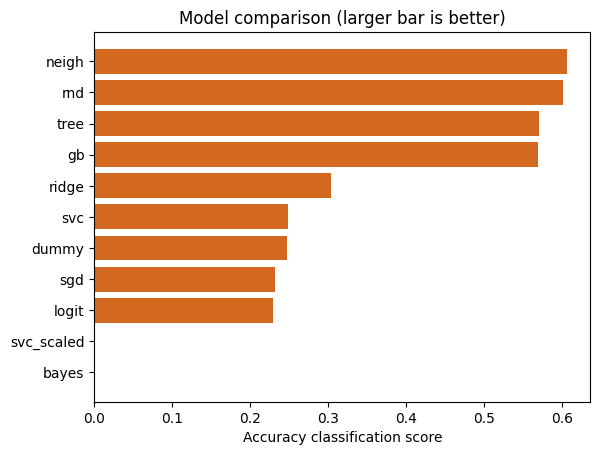

In [89]:
df_scores.sort_values('accuracy_score', ascending=True, inplace=True)
plt.barh(np.arange(len(lst_name_clf)), df_scores.accuracy_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf)), df_scores.name_clf)
#plt.xlim(0, 1.2)
plt.title('Model comparison (larger bar is better)')
plt.xlabel('Accuracy classification score')
plt.show()

## Measure and compare classifiers performance and frecuencies

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [91]:
cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

NameError: name 'y_va_350' is not defined

## Analyze the types of errors the models make
Study best classifier to best frequency

In [ ]:
train_mo = train_pr_shifted.copy().rename(columns = {'Frequency (GHz)':'freq'})
train_mo_350 = train_mo[train_mo.freq == 350].drop(columns=['freq_target']) 
train_mo_350.info()

In [ ]:
train_mo_350['exp(HG)'] = train_mo_350['HG (mV)'].apply(lambda x: np.expm1(x/1000))
train_mo_350.head()

Binning, Discretization, Linear Models, and Trees

In [ ]:
warnings.filterwarnings('ignore')
freq = 350
ncols = 5
nrows = 3
nums_plastics = 0

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
    for c in range (ncols):
        t = train_mo_350['target'].value_counts().index.sort_values().tolist()
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[nums_plastics])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        nums_plastics = nums_plastics +1
plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_set_350, validate_set_350 = train_test_split(train_mo_350, test_size=0.2, random_state=42)

y_tr_350 = train_set_350.target
y_va_350 = validate_set_350[['target']]

X_tr_350 = train_set_350.drop(columns=['target'])
X_va_350 = validate_set_350.drop(columns=['target'])
X_tr_350.info()

In [ ]:
neigh_clf_350 = KNeighborsClassifier().fit(X_tr_350.to_numpy(), y_tr_350.to_numpy())
y_pred_350 = neigh_clf_350.predict(X_va_350.to_numpy())
neigh_score_350 = accuracy_score(y_va_350.target.to_numpy(), y_pred_350) #0.5896686159844055

In [ ]:

cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

Columns are type produced and rows are type preceved. 

* `Type 0`: 256 samples are produced and perceived well. 97 are perceived like type 2, 48 samples as type 4, and so on
* `Type 1`: 261 samples are produced and perceived well. 173 are perceived like type 9, 43 samples as type 12, and so on
* etc.

In [ ]:
freq = 350
ncols = 2
nrows = 10
i = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 28))
for r in range(nrows):
    for c in range (ncols):
        t = [0, 2, 0, 7, 1, 9, 1, 14, 2, 4, 4, 8, 5, 12, 8, 13, 9, 14, 12, 14]
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[i])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        #sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)x2',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[i]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        i = i + 1
plt.suptitle(f"Major mistakes produced and preceved of each plastic at {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_mo_350_t12 = train_mo_350[train_mo_350.target==12]['HG (mV)']
sns.kdeplot(train_mo_350_t12,color='#00BFC4', label='HG (mV)', fill =True)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot-dense')
kb.fit(train_mo_350_t12.values.reshape(-1, 1))
train_mo_350_binned = kb.transform(train_mo_350_t12.values.reshape(-1, 1))
kb.bin_edges_[0]

In [ ]:
temp = np.array([1,2,3])
temp.reshape(-1, 1)
temp.reshape(1, -1)

np.random.random((1,10))[0]

# Present your solution

In [92]:
train_sol = train_mo.copy()
train_sol.head()

,target,freq,LG (mV),HG (mV),LG (mV)_shifted,HG (mV)_shifted,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
273134,3.0,410.0,1.159810,346.844099,101.159810,446.844099,4.417210,0.346126,0.587890,0.345615,0.335734,288.642626,56.029246,3139.276433,283.787103
6232,0.0,140.0,53.107068,0.854599,153.107068,100.854599,0.658719,58.507155,11.273205,127.085148,55.686118,-0.014273,0.451244,0.203621,-0.000018
211237,2.0,500.0,-0.244170,89.641068,99.755830,189.641068,1.901052,0.082824,0.521616,0.272083,0.091564,80.834251,19.124369,365.741473,86.375289
274763,3.0,420.0,-0.640947,250.671464,99.359053,350.671464,3.529336,0.246111,0.546503,0.298665,0.244170,203.933993,51.885466,2692.101616,214.457934
105606,1.0,300.0,1.098767,350.262535,101.098767,450.262535,4.453690,1.682244,0.662947,0.439499,1.678672,49.439317,124.722213,15555.630310,0.213647


## Explain why your solution achieves the objective


**Notice**: Type of plastic are changed by numbers so `A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF` are `0`, `1`, `2`, `3`, `4`, etc. and so on

In [93]:
lst_target = validate_set['target'].drop_duplicates().sort_values().values.tolist()
lst_freq = test_set['freq'].drop_duplicates().sort_values().values.tolist()

### Evaluate the accuracy of a classification of the best classificator

In [94]:
y_pred = neigh_clf.predict(X_va.to_numpy())

Compare true target with predictions to evaluate solutions

In [95]:
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)

X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq.head()


,target,y_pred,true_pred,freq
198634,2.0,0.0,0,410.0
252945,3.0,3.0,1,270.0
91958,1.0,1.0,1,210.0
28023,0.0,3.0,0,280.0
34786,0.0,0.0,1,330.0


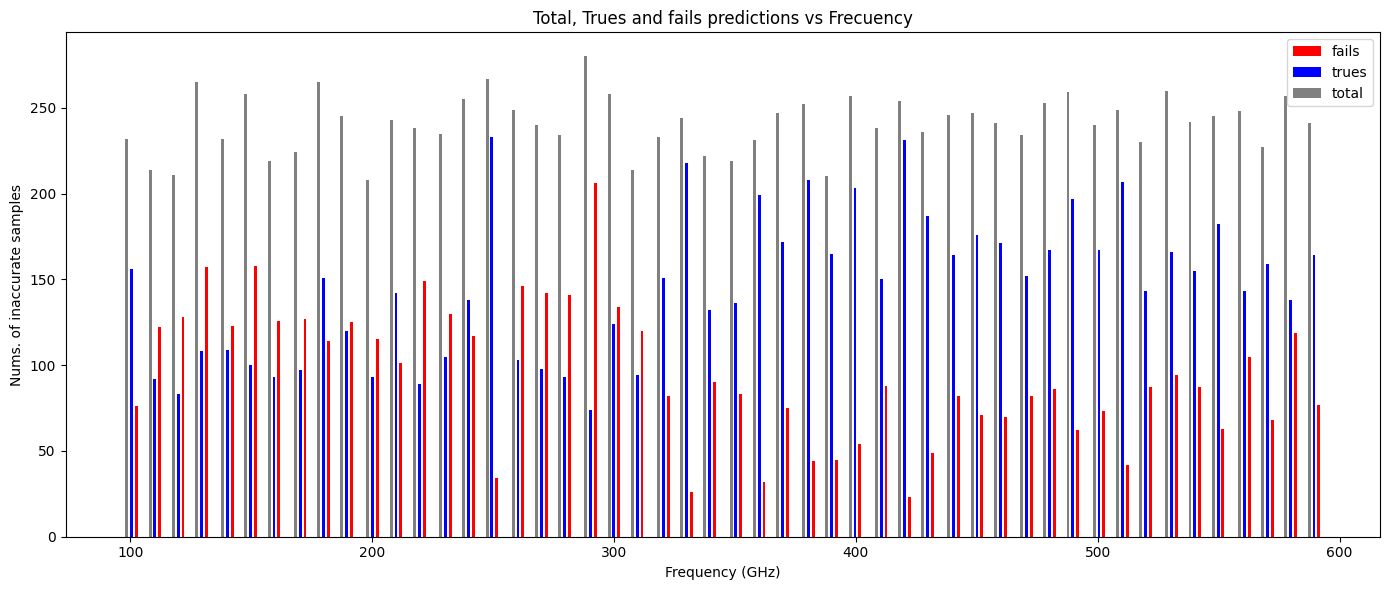

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency')
plt.tight_layout()
plt.show()

**Insights** : 
* Central frecuencies have less fails than lower and upper frecuencies
* The frequency with the highest accuracy can now be identified: `350 Ghz`
get").

### Count the number of times instances of types of plastics are misclassified

**Code_Fixit**: change 

In [97]:

y_pred = neigh_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

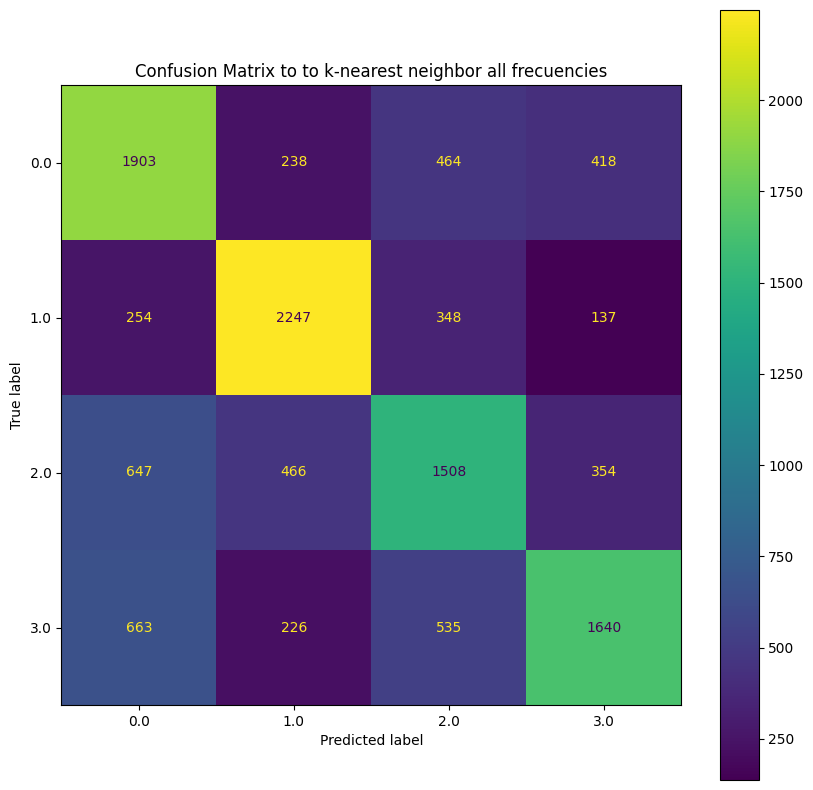

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_va.target.to_numpy(), y_pred, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to to k-nearest neighbor all frecuencies')
disp.plot(ax=ax)

**Insights**:
* Count the number of times instances of class `0` (or `A1`) are classified as otherone class `1`, `2` and so on. The first row of this matrix shows 418 (of 1224 samples) were correctly classified and non class 806 (115+89+57+116+38+54+47+53+27+25+30+34+47+74) were wrongly classified. 115 as type 1,  89 as type 2 and so on. 
* Besides, the first columns shows that class `0`  were wrongly classified 1795 (159+170+119+197+85+119+112+127+99+86+119+121+114+168) by other class. He might be the plastic which was most often confused by other plastic.


### Of validate dataset, explore what frecuencies classified by target 

In [99]:
X_va_inaccurate = X_va_freq[X_va_freq.true_pred==0]

In [120]:
temp_lst[0].

'B1'

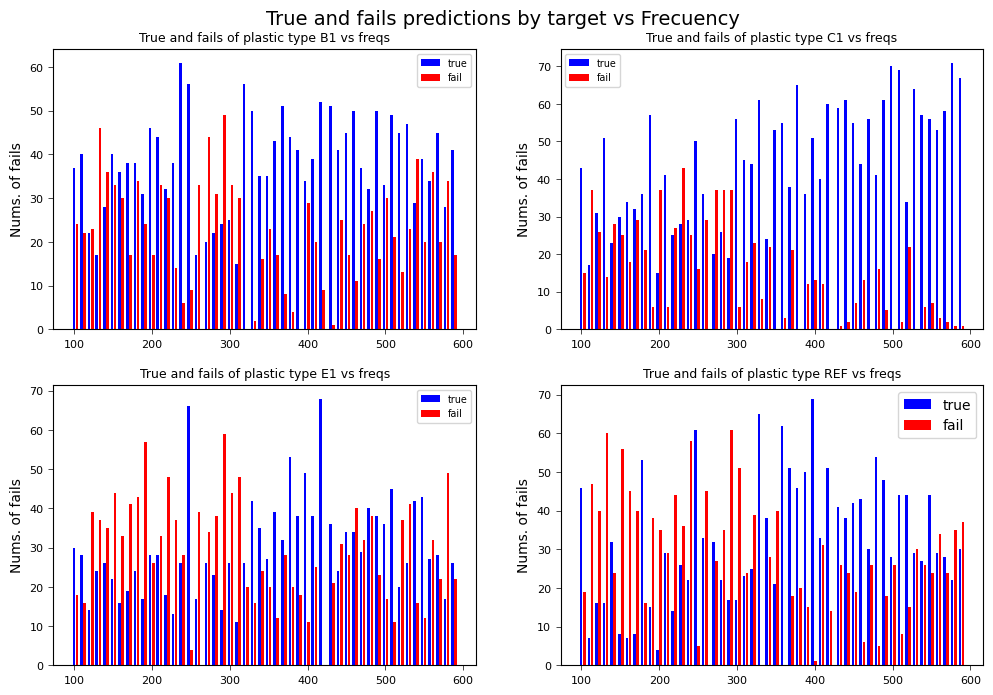

In [122]:
temp_lst = ordinal_encoder.categories_[0][0:4].tolist()
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        temp_lst[t]
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {temp_lst[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"True and fails predictions by target vs Frecuency", y=0.93,fontsize=14)
plt.legend()
plt.show()           

**Insights**: 
'B1', 'C1', 'E1', 'REF' 

* The material that is detected with the highest accuracy can now be identified: Type 3, 4, 11, 12, and 14 at various frequencies, type 8 and 15 at 350, type 13 at 250.
* The material with the lowest accuracy can now be identified, type 2 and 9 show failures at all frequencies.